In [38]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Separate features and target variable
X = df.drop(columns=["Class"])
y = df["Class"]

# Apply SMOTE to balance the fraudulent class
smote = SMOTE(sampling_strategy={1: 800}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to a DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=["Class"])], axis=1)

# Sample 1200 normal transactions
final_normal_sample = resampled_df[resampled_df["Class"] == 0].sample(n=1200, random_state=42)
final_fraud_sample = resampled_df[resampled_df["Class"] == 1].sample(n=800, random_state=42)

# Combine and shuffle the new dataset
balanced_df = pd.concat([final_normal_sample, final_fraud_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

# Verify balanced_dfthe new class distribution
print(balanced_df["Class"].value_counts())


0    1200
1     800
Name: Class, dtype: int64


In [39]:
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,35866.000000,-2.044489,3.368306,-3.937111,5.623120,-3.079232,-1.253474,-5.778880,1.707428,-4.467103,...,1.483594,0.834311,-0.148486,0.001669,-0.038996,0.389526,1.300236,0.549940,7.610000,1
1,83442.000000,1.207869,0.222845,0.066602,1.196308,0.327502,0.316073,0.122808,-0.015837,0.213170,...,-0.141472,-0.141489,-0.184375,-0.733732,0.801658,-0.264073,0.043071,0.010794,16.880000,0
2,120033.327997,-4.347303,3.695882,-5.221096,4.545437,-1.179876,-0.102489,-3.550435,-3.162100,-0.671669,...,3.898411,-0.720629,1.056482,0.046865,-0.015721,0.139422,0.358559,0.905091,74.552338,1
3,50496.000000,-0.606097,0.857261,1.610462,1.197580,0.348393,0.493555,0.782100,0.108018,-0.536888,...,-0.046857,-0.003882,-0.276597,-0.417394,0.533115,-0.101529,0.088540,0.071364,53.250000,0
4,35899.000000,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,-5.015491,...,1.080323,-0.561384,0.102678,-0.067195,-0.476931,-0.103716,1.166961,0.663632,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,86432.000000,1.981747,0.185829,-3.650369,0.472330,3.227952,3.064342,0.110297,0.659683,-0.016435,...,-0.030410,-0.005797,-0.007357,0.579516,0.505819,-0.472800,0.016516,-0.032221,24.630000,0
1996,138983.344125,-2.711195,-0.526866,-2.531775,2.919754,2.182220,0.098251,-1.800977,0.449645,-1.558757,...,0.405270,1.554120,-0.110281,-0.507877,-0.041929,0.752934,0.157794,0.422784,9.430981,1
1997,61944.000000,-2.242599,0.091694,1.335811,0.234568,1.097002,0.989207,-0.325398,-0.368086,0.275580,...,0.594285,-0.007640,-0.503496,-0.533261,-0.520751,0.270840,-0.005266,-0.658016,10.670000,0
1998,115691.000000,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,...,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,17.060000,1


In [40]:
print(balanced_df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


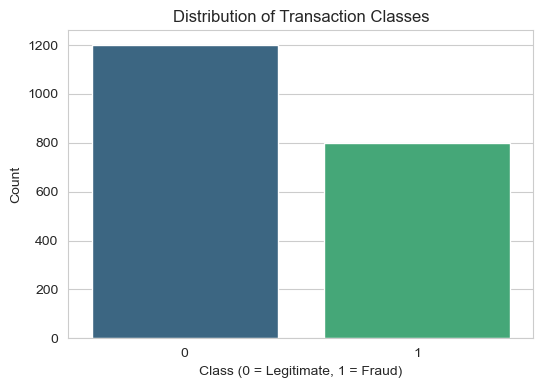

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set a consistent style for plots
sns.set_style("whitegrid")

# 1. Distribution of 'Class' (Fraud vs Legitimate)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=balanced_df, palette='viridis')
plt.title("Distribution of Transaction Classes")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

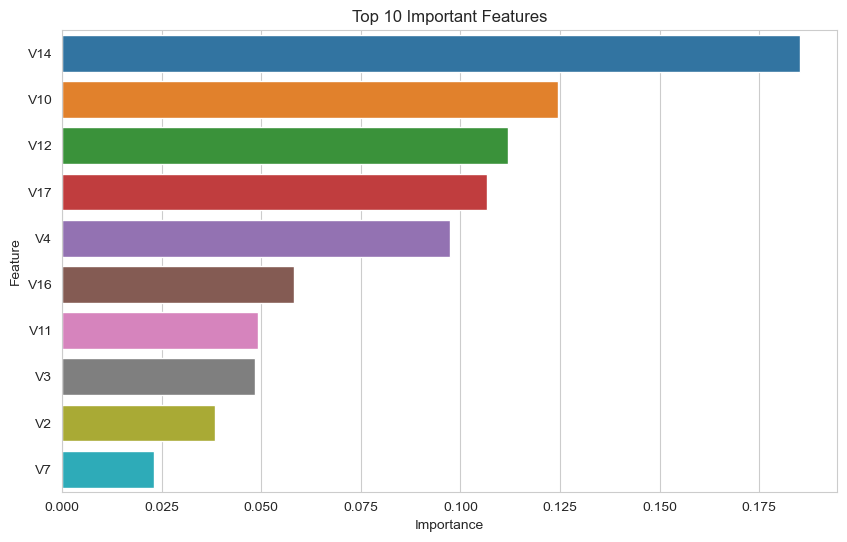

Top Features:
    Feature  Importance
14     V14    0.185279
10     V10    0.124449
12     V12    0.112005
17     V17    0.106595
4       V4    0.097432
16     V16    0.058312
11     V11    0.049178
3       V3    0.048456
2       V2    0.038422
7       V7    0.023099


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features and target again
X = balanced_df.drop(columns=["Class"])
y = balanced_df["Class"]


# Initialize scaler (choose one)
scaler = MinMaxScaler()  # Use MinMaxScaler() if you prefer scaling between 0 and 1

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Split data to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest model to check feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance[:10])
plt.title("Top 10 Important Features")
plt.show()

# Print the most important features
print("Top Features:\n", feature_importance.head(10))


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 1, 128)            71168     
                                                                 
 dropout_68 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_39 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_69 (Dropout)        (None, 64)                0         
                                                                 
 dense_98 (Dense)            (None, 32)                2080      
                                                                 
 dense_99 (Dense)            (None, 1)                 33        
                                                                 
Total params: 122,689
Trainable params: 122,689
Non-t

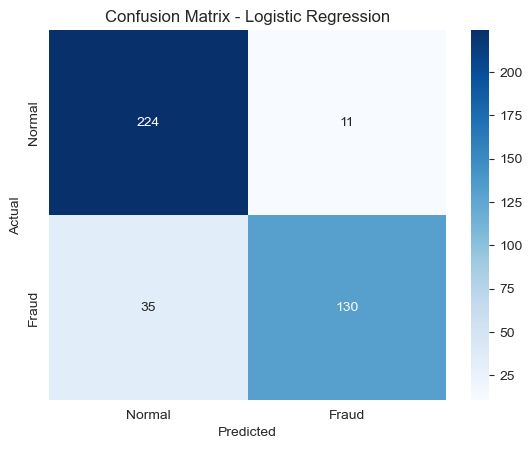


Confusion Matrix for Random Forest:



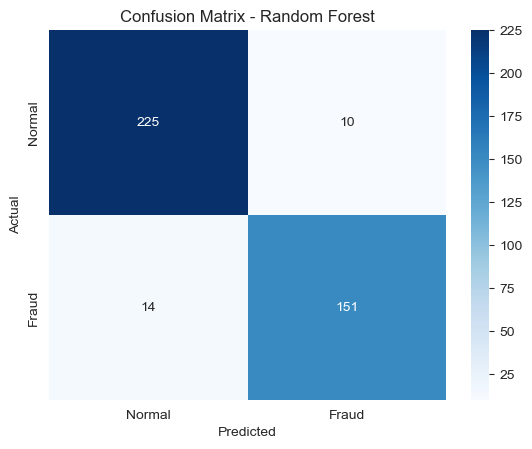

C:\Users\RYZEN\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [16:47:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix for XGBoost:



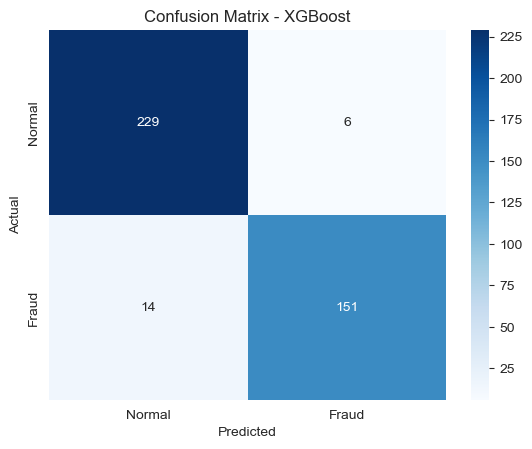


Confusion Matrix for Neural Network (MLP):



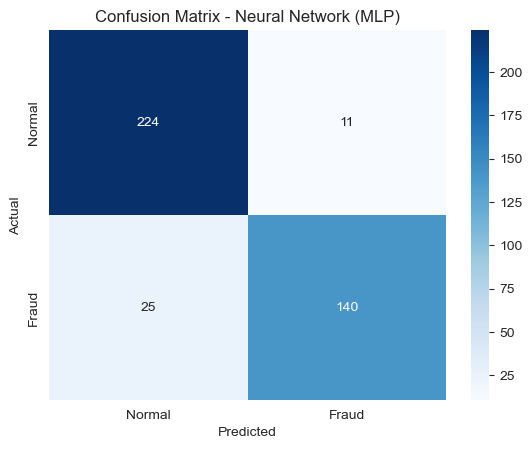

13/13 [==============================] - 0s 630us/step

Confusion Matrix for Deep Learning Model (Keras):



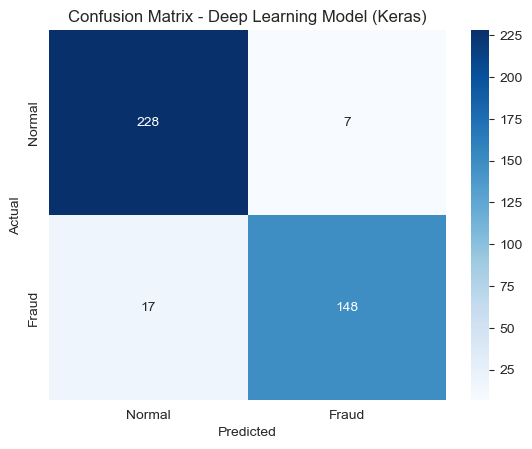

13/13 [==============================] - 0s 1ms/step

Confusion Matrix for LSTM Model:



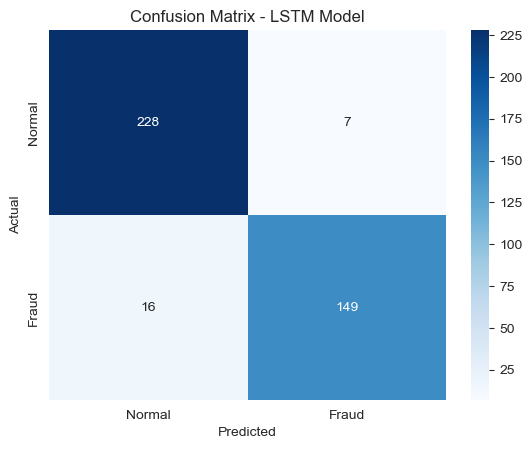


Model Performance Comparison:
                          Model  Accuracy  Precision    Recall  F1-Score
2                      XGBoost    0.9500   0.961783  0.915152  0.937888
5                   LSTM Model    0.9425   0.955128  0.903030  0.928349
1                Random Forest    0.9400   0.937888  0.915152  0.926380
4  Deep Learning Model (Keras)    0.9400   0.954839  0.896970  0.925000
3         Neural Network (MLP)    0.9100   0.927152  0.848485  0.886076
0          Logistic Regression    0.8850   0.921986  0.787879  0.849673


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Mapping of original feature names to descriptive names
feature_name_mapping = {
    'V14': 'Amount of Transaction',
    'V10': 'Frequency of Transaction',
    'V12': 'Age of Customer',
    'V17': 'Transaction Location',
    'V4': 'Device Used',
    'V16': 'Customer History',
    'V11': 'Account Type',
    'V3': 'Transaction Time',
    'V2': 'Merchant Type',
    'V7': 'Account Balance'
}

# Make sure top_features contains the original feature names (V14, V10, etc.)
top_features = feature_importance["Feature"].head(10).tolist()

# Ensure X_train and X_test are DataFrames
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=feature_importance["Feature"])  # Add column names

if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_importance["Feature"])  # Add column names

# Select top features from DataFrame
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


# Apply the mapping to get meaningful names for the selected features
top_features_meaningful = [feature_name_mapping.get(f, f) for f in top_features]

# Rename the selected columns in X_train and X_test for readability
X_train_selected.columns = top_features_meaningful
X_test_selected.columns = top_features_meaningful

# Create a simple deep learning model (Keras)
def create_deep_learning_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Reshape data for LSTM (3D array: samples, time steps, features)
# LSTM expects 3D input, so we need to reshape the data into (samples, time_steps, features)
X_train_lstm = X_train_selected.values.reshape((X_train_selected.shape[0], 1, X_train_selected.shape[1]))  # Time steps = 1 (assuming 1D sequence)
X_test_lstm = X_test_selected.values.reshape((X_test_selected.shape[0], 1, X_test_selected.shape[1]))

# Create and train the LSTM model
lstm_model = build_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_model.summary()

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', 
              alpha=1e-4, learning_rate='adaptive', max_iter=5000, random_state=42),
    "Deep Learning Model (Keras)": create_deep_learning_model,
    "LSTM Model": build_lstm_model
}


# Train and evaluate each model
results = []
for name, model in models.items():
    # If the model is a neural network, it requires reshaping
    if name == "Neural Network (MLP)":
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        y_pred = (y_pred > 0.5)  # Convert predictions to binary (0 or 1)
    elif name == "Deep Learning Model (Keras)":
        # Create and train the deep learning model
        dl_model = create_deep_learning_model(X_train_selected.shape[1])
        dl_model.fit(X_train_selected, y_train, epochs=5000, batch_size=64, verbose=0)
        y_pred = dl_model.predict(X_test_selected)
        y_pred = (y_pred > 0.5).astype(int)  # Convert predictions to binary (0 or 1)
    elif name == "LSTM Model":
        # Train the LSTM model
        lstm_model.fit(X_train_lstm, y_train, epochs=5000, batch_size=64, verbose=0)
        y_pred = lstm_model.predict(X_test_lstm)
        y_pred = (y_pred > 0.5).astype(int)  # Convert predictions to binary (0 or 1)
    else:
        # Train the traditional machine learning models
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1})
    
    # Print Confusion Matrix
    print(f"\nConfusion Matrix for {name}:\n")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Display final results
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("\nModel Performance Comparison:\n", results_df)
